# Problem 6: Murder Mystery Revised : The Adventure of the Third Stain

## Problem Statement: 

Construct a small story of your own choosing in the spirit of the “Murder Mystery” we considered in class (can be from a completely different domain). Define a “prior” distribution, a “likelihood”, and justify your selection of probabilities.
Create a first folder in your team repository and write a script containing fully vectorized code which simulates your story and outputs a table representing the approximate joint probabilities (which we approximated through the relative frequencies across N simulation runs). Compare this table to the analytic probabilities. How large should N be for the approximate probabilities to become almost indistinguishable from the analytic ones?


## The Adventure of the Third Stain

### Description
Within the newly renovated 221B Baker Street townhouse, the entry way is the first thing everyone who lives in the townhouse sees before walking to their apartment. This place is sacred to all 2 new residence to live in the building, but on a dark and stormy night, the landlord comes home to find the walkway a mess. The mystery now forms of who and how was this mess made? Using probabilities, the landlord hopes to get a good idea of which tenet made the mess.

### Characters
- **John Tesla**  : doctor and teacher 
- **Hemlock Holmes:** local adventure who likes to solve mysteries 

### Possible Instruments of Messiness  (tools)
- **Dirty Shoes**
- **Bat**
- **Badger**

### Probabilities:
#### Priors:
- **John Tesla:** 
  - 30% : like sterilized environments, but is known to partake in experimental arts and crafts for his students
- **Hemlock Holmes:** 
  - 70% : likes exploring new areas and is accustom to messes

#### Likelihoods:
- **John Tesla:** 
  - Dirty  Shoes (10%)
    - (often has to get new shoes as he steps in a lot of slime)
  - Bat  (70%)
    - (he's a part of a intermural baseball team on his free time)
  - Badger (20%)
    - (he likes taking care of the class pet time-to-time, but also is has enough wisdom for selecting reasonable animals to be clas pets)
- **Hemlock Holmes** 
  - Dirty Shoes  (40%)
    - (has a outfit that he wears consistently and keeps the same pair of boots)
  - Bat (10%)
    - (he never was fond of sports)
  - Badger (50%) 
    - (he likes making friends with woodland creatures, but the woodland creatures do not like making friends with him)

In [2]:
# imports
import numpy as np
import pandas as pd
from dataclasses import dataclass
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
@dataclass
class scenario:
    """Class for keeping track of an item in inventory."""
    characters: tuple = ('John Tesla', 'Hemlock Holmes')
    tools: tuple = ('Dirty Shoes', 'Bat', 'Badger')
    prior_probs: tuple = (.7, .3) # for character 1 then character 2
    character_1_probs: tuple = (.1, .7, .2)
    character_2_probs: tuple = (.4, .1, .5)

In [4]:
# Story Helper Functions

def draw_prior(suspects, probs):
    """
    Select a suspect randomly with respect for the prior probablities

    Parameters:
    -------------
    suspects    : tuple[string]
        - a tuple of strings that identify suspect's names
    probs   : tuple[float]
        - a tuple of probabilities that identifies the priors of a subject

    Returns:
    -----------
    suspect : string
        - a suspect that was selected randomly from a distribution following their probabilities
    """
    return np.random.choice(suspects, p=probs)

def draw_model(tools, character, char_1_probs, char_2_probs):
    """
    Select a tool the suspect used randomly with respect for the character and their respective probabilties using particular tools

    Parameters:
    -------------
    tools   : tuple[string]
        - a tuple of strings that identify tool's names
    character    : string
        - a character that has probabilities of which tool they may use within the 3rd or 4th argument
    char_1_probs    : tuple[float]
        - the respective probabilties of character 1 using the tools in the tools argument
    char_2_probs    : tuple[float]
        - the respective probabilties of character 2 using the tools in the tools argument
        
    Returns:
    -----------
    tool : string
        - a tool that was selected randomly with respect to the probabilities for the given character
    """

    if character == 'John Tesla':
        return np.random.choice(tools, p=char_1_probs)
    return np.random.choice(tools, p=char_2_probs)

def draw_joint(tools, suspects, prior_probs, char_1_probs, char_2_probs):
    """
    generate a selection of a character and an assosiated tool given following parameters

    Parameters:
    -------------
    tools   : tuple[string]
        - a tuple of strings that identify tool's names
    suspects    : tuple[string]
        - a tuple of strings that identify suspect's names
    prior_probs   : tuple[float]
        - a tuple of probabilities that identifies the priors of a subject
    char_1_probs    : tuple[float]
        - the respective probabilties of character 1 using the tools in the tools argument
    char_2_probs    : tuple[float]
        - the respective probabilties of character 2 using the tools in the tools argument
        
    Returns:
    -----------
    character_tool : string
        - a character and tool that was selected randomly with respect to the probabilities given
    """


    s = draw_prior(suspects, prior_probs)
    t = draw_model(tools, s, char_1_probs, char_2_probs)
    return s + ' using ' + t

def simulator(*args, num_sims=1000):
    """
    generate num_sims simulations given the probability distributions

    Parameters:
    -------------
    tools   : tuple[string]
        - a tuple of strings that identify tool's names
    suspects    : tuple[string]
        - a tuple of strings that identify suspect's names
    prior_probs   : tuple[float]
        - a tuple of probabilities that identifies the priors of a subject
    char_1_probs    : tuple[float]
        - the respective probabilties of character 1 using the tools in the tools argument
    char_2_probs    : tuple[float]
        - the respective probabilties of character 2 using the tools in the tools argument
        
    Returns:
    -----------
    character_tools : list[string]
        - a list of a character and tool that was selected randomly with respect to the probabilities given
    """

    return [draw_joint(*args) for _ in range(num_sims)]

In [5]:
# Run simulation
num_sims = 100000
situation = scenario()
sims = simulator(situation.tools, \
                 situation.characters, \
                    situation.prior_probs, \
                        situation.character_1_probs, \
                            situation.character_2_probs, \
                                num_sims=num_sims)

In [6]:
# Graph simulation results

# Identify occurences for the given situation
scenarios, occurences = np.unique(sims, return_counts=True)

# Create dataframe representation
results_df = pd.DataFrame({
    'Scenario': scenarios,
    'Occurences': occurences,
    'Approximate Probability': occurences / num_sims
})

# Define analytical probabilities for situation
analytic_probs = {
    'John Tesla using Dirty Shoes': situation.prior_probs[0] *  situation.character_1_probs[0],
    'John Tesla using Bat': situation.prior_probs[0] * situation.character_1_probs[1],
    'John Tesla using Badger': situation.prior_probs[0] * situation.character_1_probs[2],
    'Hemlock Holmes using Dirty Shoes': situation.prior_probs[1] * situation.character_2_probs[0],
    'Hemlock Holmes using Bat': situation.prior_probs[1] *  situation.character_2_probs[1],
    'Hemlock Holmes using Badger': situation.prior_probs[1] *  situation.character_2_probs[2]
}

# Add analytical probabilities for situation
results_df['Analytic Probability'] = results_df['Scenario'].map(analytic_probs)

# Display results
results_df

,Scenario,Occurences,Approximate Probability,Analytic Probability
0,Hemlock Holmes using Badger,14984,0.14984,0.15
1,Hemlock Holmes using Bat,3025,0.03025,0.03
2,Hemlock Holmes using Dirty Shoes,11945,0.11945,0.12
3,John Tesla using Badger,13850,0.13850,0.14
4,John Tesla using Bat,49343,0.49343,0.49
5,John Tesla using Dirty Shoes,6853,0.06853,0.07


In [35]:
# plot increasing N

situation = scenario()

x_axis = []
loss_record = []

for N in np.logspace(0, 8, num=20,  base=10, dtype='int'):
    print(N)
    
    sims = simulator(situation.tools, \
                 situation.characters, \
                    situation.prior_probs, \
                        situation.character_1_probs, \
                            situation.character_2_probs, \
                                num_sims=num_sims)

    scenarios, occurences = np.unique(sims, return_counts=True)

    scenario_dict = dict(zip(scenarios, occurences / num_sims))

    # save the loss in reference to the analyitical probability for a senario
    loss_record.append(np.abs(scenario_dict["Hemlock Holmes using Badger"] - analytic_probs["Hemlock Holmes using Badger"]))

    x_axis.append(N)

1
2
6
18
48
127
335
885
2335
6158
16237
42813
112883
297635
784759
2069138
5455594
14384498
37926901
100000000


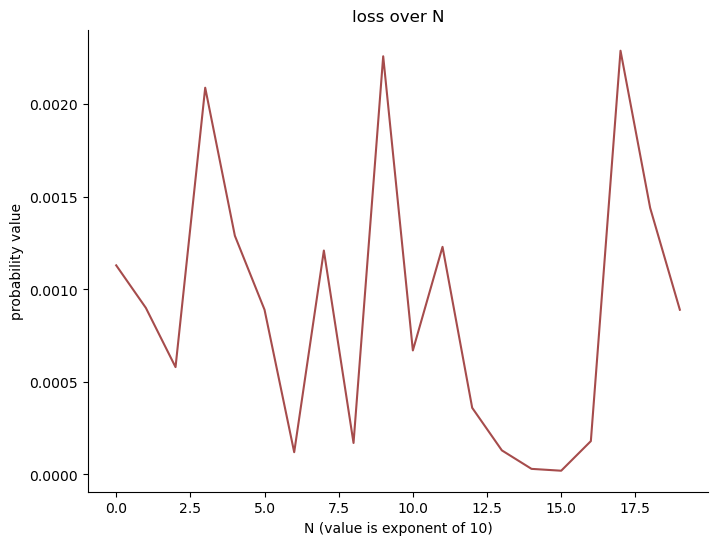

In [36]:
# Create the plot

f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(loss_record, color='maroon', alpha=0.7)
sns.despine(ax=ax)
ax.set_xlabel('N (value is exponent of 10)')
ax.set_ylabel('probability value')
ax.set_title('loss over N')

plt.show()

We know the more simulations we run, the more accure we will get, but from a rough analyisis, it can be posutulated that an N of ~1000000 will provide approximate probabilities to become almost indistinguishable from the analytic ones as the graph indicates that the values converge at that N.